ASSIGNMENT 3 on FITTING

D/ENG/21/0152/EE
K.H.M. NILHARA

GitHub Link - https://github.com/m-a-n-d-i/Assignment-3

Q1 , Q2

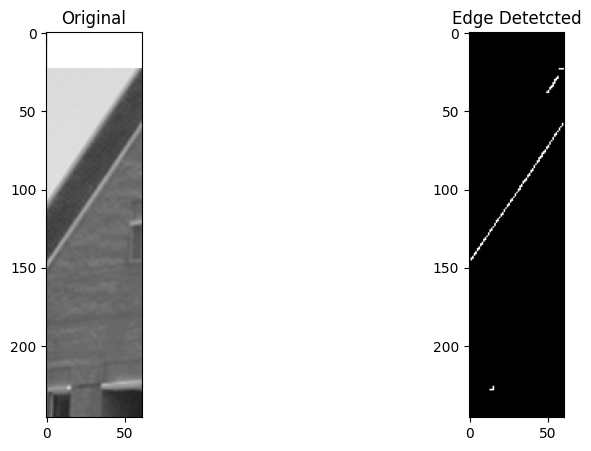

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread('building_crop.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None

edges = cv.Canny(im, 350, 390)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(im, cmap='gray', vmin=0, vmax =250)
ax[0].set_title('Original')
ax[1].imshow(edges, cmap='gray', vmin=0, vmax=250)
ax[1].set_title('Edge Detetcted')
plt.show() 

Q3

(array([ 23,  23,  23,  23,  28,  29,  29,  30,  30,  31,  32,  32,  33,
        34,  34,  35,  35,  36,  37,  38,  38,  58,  59,  60,  61,  62,
        63,  64,  65,  65,  66,  67,  68,  69,  70,  71,  72,  73,  73,
        74,  75,  76,  76,  77,  77,  78,  79,  79,  80,  80,  81,  82,
        82,  83,  84,  85,  86,  87,  88,  88,  89,  90,  91,  91,  92,
        93,  94,  94,  95,  95,  96,  97,  98,  98,  99, 100, 100, 101,
       102, 103, 104, 105, 106, 107, 107, 108, 109, 110, 110, 111, 112,
       113, 114, 115, 116, 116, 117, 118, 119, 120, 120, 121, 122, 123,
       124, 125, 126, 126, 127, 128, 129, 130, 131, 132, 132, 133, 134,
       135, 135, 136, 137, 138, 138, 139, 140, 141, 141, 142, 143, 144,
       144, 145, 226, 227, 228, 228, 228], dtype=int64), array([57, 58, 59, 60, 56, 55, 56, 54, 55, 54, 53, 54, 53, 52, 53, 51, 52,
       51, 50, 49, 50, 59, 59, 58, 57, 57, 56, 55, 54, 55, 54, 53, 53, 52,
       51, 51, 50, 49, 50, 49, 48, 47, 48, 46, 47, 46, 45, 46, 44, 45, 4

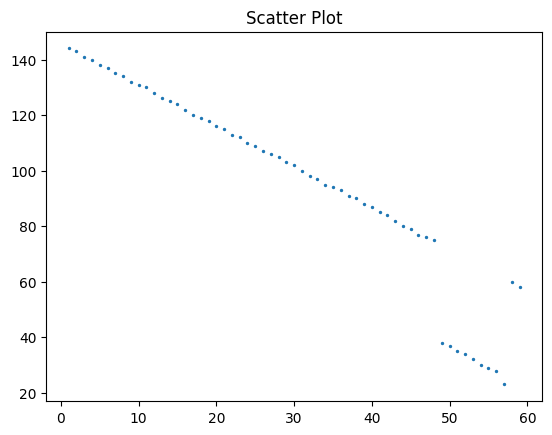

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread('building_crop.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None

edges = cv.Canny(im, 350, 390)
indices = np.where(edges != [0])
if len(indices) == 0:
    print("No edges detected in the image")
    exit()
print(indices)
print(len(indices))
x_list = []
y_list = []
for i in range(len(indices[1])):
    if indices[1][i] not in x_list and indices[0][i] not in y_list:
        x_list.append(indices[1][i])
        y_list.append(indices[0][i])

x = np.array(x_list)
y = np.array(y_list)

plt.scatter(x, y, s=2)
plt.title('Scatter Plot')
plt.show()

Q6

Accuracy of the estimated roof angle depends on the quality and quantity of data points used to calculate the least-squares-fit line. Least squares line fitting can be inaccurate due to various factors such as outliers, nonlinear data, small sample size, correlated errors, and violation of model assumptions. Outliers can significantly skew the results and make the estimated angle value less accurate. Nonlinear data may not follow a linear relationship, leading to an inaccurate estimate of the angle value. It is clear from the above output that there are outliers which don't fit the line. Therefore, we cannot assume that this estimation is correct.

Q7

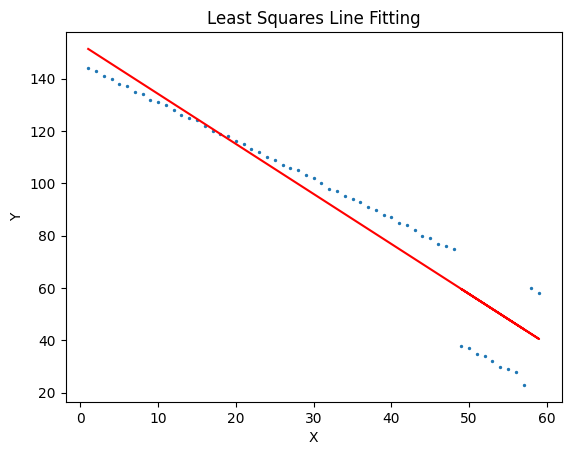

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('building_crop.jpg', cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img, 350 , 390)
indices = np.where(edges != [0])
x_list = []
y_list = []
for i in range(len(indices[1])):
    if indices[1][i] not in x_list and indices[0][i] not in y_list:
        x_list.append(indices[1][i])
        y_list.append(indices[0][i])

x = np.array(x_list)
y = np.array(y_list)

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

plt.scatter(x, y, s=2)
plt.plot(x, m*x + c, 'r')
plt.title('Least Squares Line Fitting')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Q8

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('building_crop.jpg', cv.IMREAD_GRAYSCALE)
edges = cv.Canny(img, 350 , 390)
indices = np.where(edges != [0])
if len(indices) == 0:
    print("No edges detected ")
    exit()
    
x_list = []
y_list = []
for i in range(len(indices[1])):
    if indices[1][i] not in x_list and indices[0][i] not in y_list:
        x_list.append(indices[1][i])
        y_list.append(indices[0][i])

x = np.array(x_list)
y = np.array(y_list)

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

angle_degrees = np.arctan(m) * 180 / np.pi
print("Estimated Roof Angle: {:.2f} degrees".format(angle_degrees))

Estimated Roof Angle: -62.37 degrees


Q10

RANSAC Algorithm

Q11

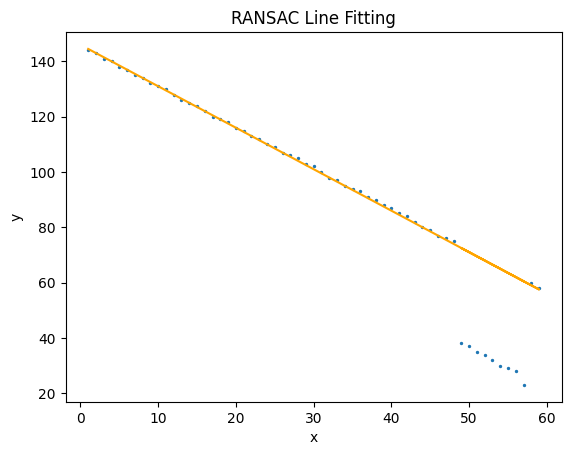

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('building_crop.jpg', cv.IMREAD_GRAYSCALE)
edges = cv.Canny(img, 350 , 390)
indices = np.where(edges != [0])
if len(indices) == 0:
    print("No edges detected")
    exit()
    
x_list = []
y_list = []
for i in range(len(indices[1])):
    if indices[1][i] not in x_list and indices[0][i] not in y_list:
        x_list.append(indices[1][i])
        y_list.append(indices[0][i])

x = np.array(x_list)
y = np.array(y_list)

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

# RANSAC parameters
n_iterations = 1000
n_points = 2
threshold = 5

best_line = None
max_inliers = 0

# Running RANSAC algorithm
for i in range(n_iterations):

    sample_indices = np.random.choice(len(x), size=n_points, replace=False)
    sample_x = x[sample_indices]
    sample_y = y[sample_indices]

    line = np.polyfit(sample_x, sample_y, 1)

    distances = np.abs(line[0]*x - y + line[1]) / np.sqrt(line[0]**2 + 1)

    inliers = np.sum(distances < threshold)

    if inliers > max_inliers:
        best_line = line
        max_inliers = inliers

m, c = best_line
plt.figure()
plt.scatter(x, y, s=2)
plt.plot(x, m*x + c, color='orange', linewidth=1.5)
plt.title('RANSAC Line Fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Q12

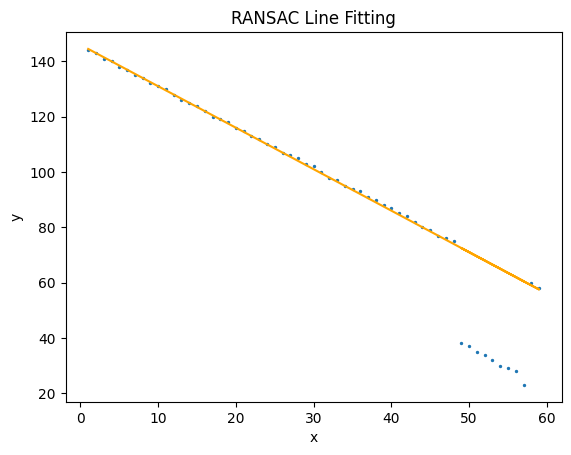

Estimated Roof Angle Using RANSAC: -56.31 degrees


In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('building_crop.jpg', cv.IMREAD_GRAYSCALE)
edges = cv.Canny(img, 350 , 390)
indices = np.where(edges != [0])
if len(indices) == 0:
    print("No edges detected")
    exit()
    
x_list = []
y_list = []
for i in range(len(indices[1])):
    if indices[1][i] not in x_list and indices[0][i] not in y_list:
        x_list.append(indices[1][i])
        y_list.append(indices[0][i])

x = np.array(x_list)
y = np.array(y_list)

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

# RANSAC parameters
n_iterations = 1000
n_points = 2
threshold = 5

# Initializing variables for best line and inliers
best_line = None
max_inliers = 0

# Running RANSAC algorithm
for i in range(n_iterations):

    sample_indices = np.random.choice(len(x), size=n_points, replace=False)
    sample_x = x[sample_indices]
    sample_y = y[sample_indices]

    line = np.polyfit(sample_x, sample_y, 1)

    distances = np.abs(line[0]*x - y + line[1]) / np.sqrt(line[0]**2 + 1)

    inliers = np.sum(distances < threshold)

    if inliers > max_inliers:
        best_line = line
        max_inliers = inliers

#slope and intercept of the best line
m, c = best_line

# scatter plot and estimated RANSAC line
plt.figure()
plt.scatter(x, y, s=2)
plt.plot(x, m*x + c, color='orange', linewidth=1.5)
plt.title('RANSAC Line Fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

roof_angle = np.arctan(m) * 180 / np.pi
print(f"Estimated Roof Angle Using RANSAC: {roof_angle:.2f} degrees")

Q13

When comparing the Least Square Line Fitting and RANSAC Line Fitting, it is obvious that the RANSAC Line Fitting is far more accurate than Least Square Line Fitting as the no of outliers in RANSAC Line Fitting is less compared to the other.
